<a href="https://colab.research.google.com/github/Heo-DaMoon/Hello/blob/master/06_SVM_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X, Y = make_circles(n_samples=500, noise = 0.02)

In [ ]:
X.shape

(500, 2)

In [ ]:
Y.shape

(500,)

In [ ]:
Y[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
x1 = X[:, 0]
x2 = X[:, 1]

(-1.125489152009972,
 1.1139760939553565,
 -1.1115439456885836,
 1.149420391648709)

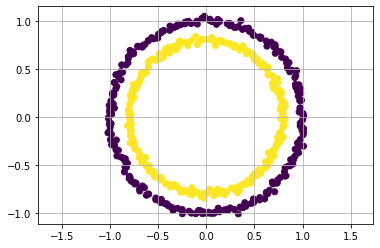

In [ ]:
plt.scatter(x1, x2, c=Y)
plt.grid('on')
plt.axis('equal')

In [ ]:
x3 = x1**2 + x2**2

In [ ]:
x3[0]

1.020311328427282

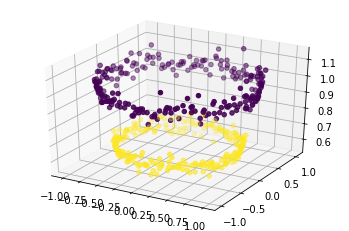

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=Y)

## SVM 테스트 #1

In [ ]:
from sklearn.svm import SVC
model1 = SVC(kernel = 'linear')

In [ ]:
model1.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM2D(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(5,5))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

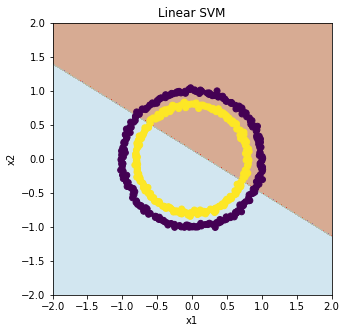

In [ ]:
PlotSVM2D(X, Y, model=model1, title='Linear SVM')

### SVM 테스트 #2

In [ ]:
X.shape

(500, 2)

In [ ]:
X2 = np.vstack((x1, x2, x3)).T

In [ ]:
X1 = np.vstack((x1, x2)).T

In [ ]:
X2.shape

(500, 3)

In [ ]:
model2 = SVC(kernel= 'linear')

In [ ]:
model2.fit(X2,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM3D(X, Y, model):
  import numpy as np
  X1 = X[:, 0]
  X2 = X[:, 1]
  X3 = X[:, 2]
  w = model.coef_ 
  b = model.intercept_ 

  x1, x2 = np.meshgrid(X1, X2) 
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  fig = plt.figure() 
  axes2 = fig.add_subplot(111, projection = '3d') 
  axes2.scatter(X1, X2, X3, c = Y) 
  axes1 = fig.gca(projection = '3d') 
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
  #plt.show()

In [ ]:
X2.shape

(500, 3)

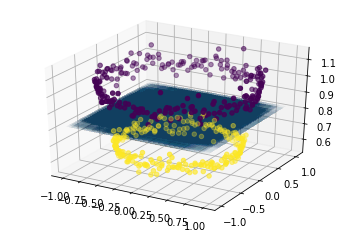

In [ ]:
PlotSVM3D(X2, Y, model=model2)

#### SVM 테스트 #3

In [ ]:
model3 = SVC(kernel ='rbf')

In [ ]:
model3.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

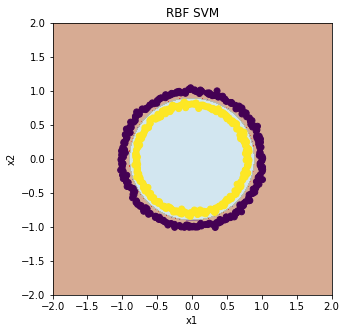

In [ ]:
PlotSVM2D(X, Y, model=model3, title='RBF SVM')

#### SVM 테스트 #4

In [ ]:
x4 = x1**2 + x3**2

In [ ]:
x4[:10]

array([1.26781988, 1.7793714 , 1.72353355, 0.59610916, 0.97504243,
       0.9339082 , 1.08204398, 1.63919403, 0.41411497, 0.97774705])

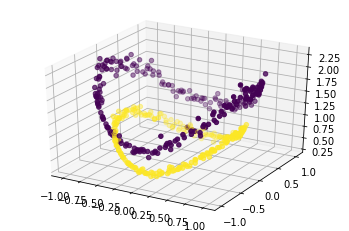

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x4, c=Y)

In [ ]:
X4 = np.vstack((x1, x2, x4)).T

In [ ]:
X4[0]

array([-0.47621915, -0.89080113,  1.26781988])

In [ ]:
X4[:4]

array([[-0.47621915, -0.89080113,  1.26781988],
       [ 0.92256316, -0.33516236,  1.7793714 ],
       [ 0.838594  ,  0.55394582,  1.72353355],
       [-0.44450889,  0.6585568 ,  0.59610916]])

In [ ]:
X4.shape

(500, 3)

In [ ]:
Y.shape

(500,)

In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel = 'linear')

In [ ]:
model4.fit(X4, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

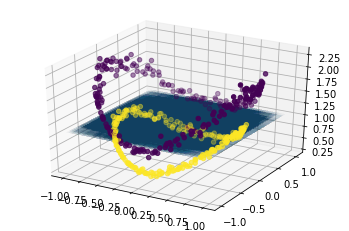

In [ ]:
PlotSVM3D(X4, Y, model=model4)

In [ ]:
model4 = SVC(kernel ='rbf')

In [ ]:
model4.fit(X4, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
PlotSVM2D(X4, Y, model=model4, title='RBF SVM2')

ValueError: ignored

먼저 X4를 설정하여 새로운 그래프를 보고자 함.
x4 = x1**2 + x3**2 라고 설정함. 이어 X4 = np.vstack((x1, x2, x4)).T로 X4를 설정 후 model도 헷갈리지 않도록 model4로 설정.
먼저 PlotSVM3D를 사용하여 모양 도출.
먼저 실험과 다르게 살짝 휘어있는 모습을 발견.
이어서 PlotSVM2D를 도출하고자 하였으나 X.shape[1] = 2 should be equal to 3, the number of features at training time 라는 오류가 발생하여 고쳐보려 해였으나 결국 해결하지 못함.
아마 2와 3이 같아서 되지 않느 다는 것 같다. 이걸 해결하기 위하여 어떠한 방법을 취해야 하는지 발견하지 못함.